In [ ]:
# Install PyTorch with CUDA 13.0 support and the latest version of ultralytics
# GPU: RTX 5060 8GB Driver Version: 591.59  CUDA Version: 13.1
# pip3 install torch torchvision --index-url https://download.pytorch.org/whl/cu130
# %pip install -U ultralytics
# %pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/animesh/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Load a pretrained YOLO model (recommended for training)
model = YOLO("yolov8n.pt")

# Train the model using the 'coco8.yaml' dataset for 3 epochs
results = model.train(data="coco8.yaml", epochs=3)

# Evaluate the model's performance on the validation set
results = model.val()

# Perform object detection on an image using the model
results = model("https://ultralytics.com/images/bus.jpg")

success = model.export(format="onnx")

Ultralytics 8.3.247 🚀 Python-3.12.12 torch-2.9.1+cu130 CUDA:0 (NVIDIA GeForce RTX 5060, 8151MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, 

/home/animesh/miniconda3/envs/pytorch/lib/python3.12/site-packages/torch/onnx/_internal/torchscript_exporter/utils.py:1447: OnnxExporterWarning: Exporting to ONNX opset version 22 is not supported. by 'torch.onnx.export()'. The highest opset version supported is 20. To use a newer opset version, consider 'torch.onnx.export(..., dynamo=True)'. 
  warnings.warn(


ONNX: slimming with onnxslim 0.1.82...
ONNX: export success ✅ 68.1s, saved as '/home/animesh/project/DL-Tensorflow/YOLOv8/runs/detect/train/weights/best.onnx' (12.3 MB)

Export complete (72.6s)
Results saved to /home/animesh/project/DL-Tensorflow/YOLOv8/runs/detect/train/weights
Predict:         yolo predict task=detect model=/home/animesh/project/DL-Tensorflow/YOLOv8/runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/home/animesh/project/DL-Tensorflow/YOLOv8/runs/detect/train/weights/best.onnx imgsz=640 data=/home/animesh/miniconda3/envs/pytorch/lib/python3.12/site-packages/ultralytics/cfg/datasets/coco8.yaml  
Visualize:       https://netron.app


In [4]:
import cv2
from PIL import Image

model = YOLO("yolov8n.pt")

# from PIL
im1 = Image.open("bus.jpg")
results = model.predict(source=im1, save=True)  # save plotted images

# from ndarray
im2 = cv2.imread("bus.jpg")
results = model.predict(source=im2, save=True, save_txt=True)  # save predictions as labels

# from list of PIL/ndarray
results = model.predict(source=[im1, im2])


0: 640x480 4 persons, 1 bus, 1 stop sign, 25.2ms
Speed: 2.3ms preprocess, 25.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /home/animesh/project/DL-Tensorflow/YOLOv8/runs/detect/predict

0: 640x480 4 persons, 1 bus, 1 stop sign, 18.9ms
Speed: 1.8ms preprocess, 18.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /home/animesh/project/DL-Tensorflow/YOLOv8/runs/detect/predict
1 label saved to /home/animesh/project/DL-Tensorflow/YOLOv8/runs/detect/predict/labels

0: 640x480 4 persons, 1 bus, 1 stop sign, 10.1ms
1: 640x480 4 persons, 1 bus, 1 stop sign, 10.1ms
Speed: 0.8ms preprocess, 10.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 480)
Results saved to /home/animesh/project/DL-Tensorflow/YOLOv8/runs/detect/predict
3 labels saved to /home/animesh/project/DL-Tensorflow/YOLOv8/runs/detect/predict/labels


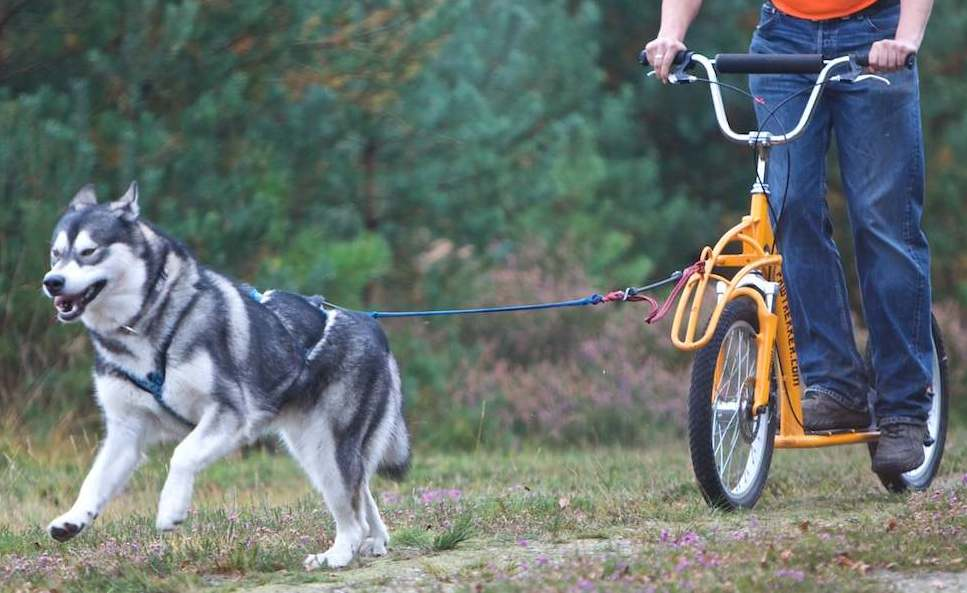

In [5]:
from PIL import Image
im3=Image.open("dog.jpg")
im3

In [6]:
model = YOLO("yolov8n.pt")

results = model.predict(source=im3, save=True)


0: 416x640 1 person, 1 bicycle, 1 dog, 18.0ms
Speed: 2.3ms preprocess, 18.0ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)
Results saved to /home/animesh/project/DL-Tensorflow/YOLOv8/runs/detect/predict2
